<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column         | Description                     |
|----------------|---------------------------------|
| `show_id`      | The ID of the show              |
| `type`         | Type of show                    |
| `title`        | Title of the show               |
| `director`     | Director of the show            |
| `cast`         | Cast of the show                |
| `country`      | Country of origin               |
| `date_added`   | Date added to Netflix           |
| `release_year` | Year of Netflix release         |
| `duration`     | Duration of the show in minutes |
| `description`  | Description of the show         |
| `genre`        | Show genre                      |

## Instructions

# Exploratory Data Analysis—Netflix Movies from the 1990s

## Analysis Tasks:

1. Find the most common movie duration from the 1990s
   - Use 1990 as a starting year
   - Save result as integer variable `duration`

2. Count short action movies from the 1990s
   - Short movie defined as < 90 minutes
   - Save count as integer variable `short_movie_count`


In [2]:
!pip install pandas
!pip install matplotlib

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv", index_col=0)

# Analyzing data (First contact)

## EDA - Exploratory Data Analysis

In [4]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [5]:
# See all dimensions
netflix_df.shape

(4812, 10)

In [6]:
# some statistics from Netflix Dataframe
netflix_df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


### Understanding data distribution

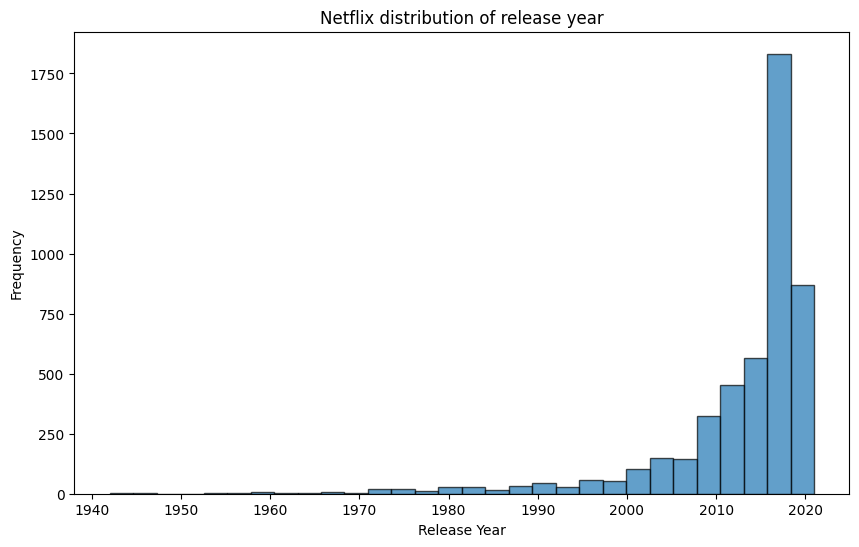

In [7]:
# Netflix distribution of release year
plt.figure(figsize=(10, 6))
plt.hist(netflix_df['release_year'], bins=30, alpha=0.7, edgecolor='black')
plt.title("Netflix distribution of release year")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()

In [8]:
# All data types from Dataframe
netflix_df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

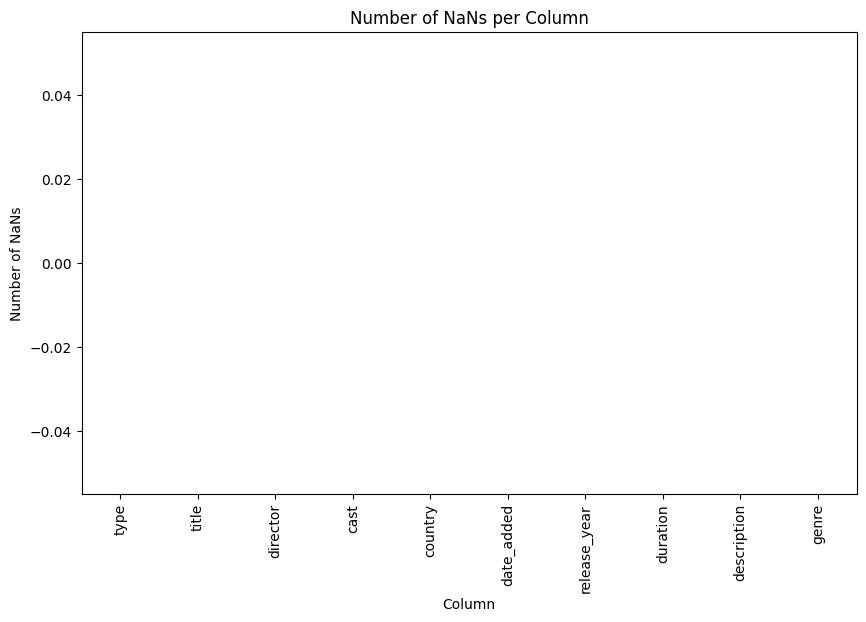

In [18]:
# Check if is NaN
null_values = netflix_df.isna().sum()
# Plot graphic for a better view
plt.figure(figsize=(10, 6))
null_values.plot(kind='bar', xlabel='Column', ylabel='Number of NaNs', title='Number of NaNs per Column')
plt.show()

In [10]:
# select only the column release year
only_col_release_year = netflix_df.loc[:, ["release_year"]]

# show table
only_col_release_year

,release_year
show_id,
s2,2016
s3,2011
s4,2009
s5,2008
s6,2016
...,...
s7779,2009
s7781,2018
s7782,2006


In [11]:
# select only 90's movies
movies = netflix_df.loc[(netflix_df['release_year'] >= 1990) &(netflix_df['release_year'] < 2000) & (netflix_df['type'] == 'Movie')]
# verifying the type of obj
type(movies)

# show table
movies


,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas
...,...,...,...,...,...,...,...,...,...,...
s7536,Movie,West Beirut,Ziad Doueiri,"Rami Doueiri, Mohamad Chamas, Rola Al Amin, Ca...",France,"October 19, 2020",1999,106,Three intrepid teens roam the streets of Beiru...,Dramas
s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,"January 1, 2021",1993,118,"In a backwater Iowa town, young Gilbert is tor...",Classic Movies
s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,106,"Armed with an ingenious arsenal, two top-notch...",Action


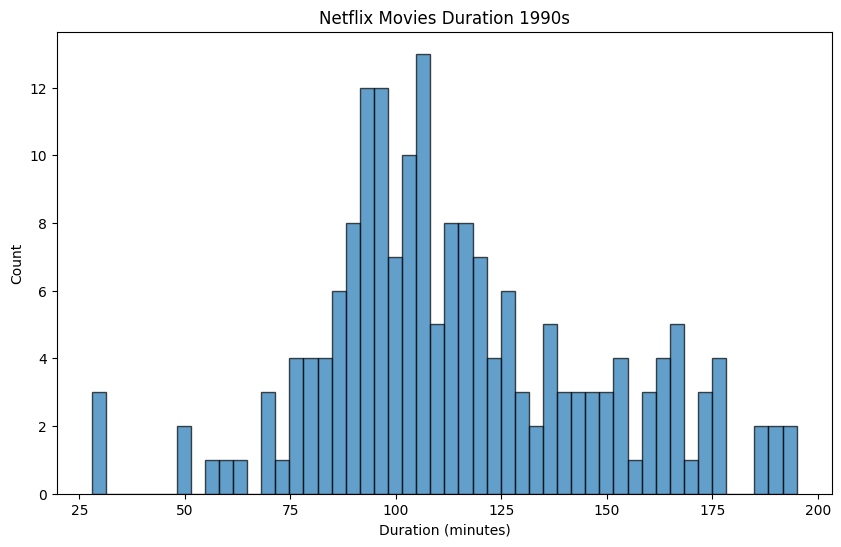

In [19]:
# Plot Netflix Movies duration
plt.figure(figsize=(10, 6))

plt.hist(movies['duration'], bins=50, alpha=0.7, edgecolor='black')
plt.title("Netflix Movies Duration 1990s")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.grid(False)
plt.show()

In [13]:
# get the most frequent movie duration
median = movies['duration'].median()
duration = int(median.item())
print(duration)

108


In [14]:
# show the values that appear most often
movies_duration = movies.loc[movies.duration == movies.duration.mode()[0], 'duration']
movies_duration

show_id
s1003    94
s2842    94
s2963    94
s4702    94
s5698    94
s6945    94
s7183    94
Name: duration, dtype: int64

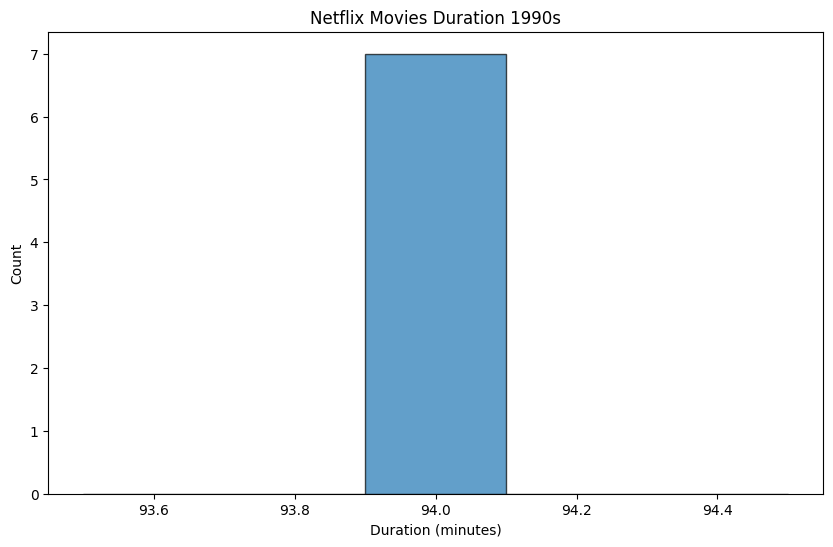

In [20]:
# plot the values that appear most often
plt.figure(figsize=(10, 6))
plt.hist(movies_duration, bins=5, alpha=0.7, edgecolor='black')
plt.title("Netflix Movies Duration 1990s")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

In [16]:
# table with short action movies from the 1990s
movies_short = movies.loc[(movies['duration'] < 90) & (movies['genre'] == 'Action') & (movies['type'] == 'Movie')]
movies_short

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action
s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...",Hong Kong,"August 1, 2018",1997,89,A pugilist from Shantung struggles to rise to ...,Action
s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action
s4787,Movie,Passenger 57,Kevin Hooks,"Wesley Snipes, Bruce Payne, Tom Sizemore, Alex...",United States,"January 1, 2021",1992,84,Air marshal John Cutter must stop notorious te...,Action
s5299,Movie,Rumble in the Bronx,Stanley Tong,"Jackie Chan, Anita Mui, Françoise Yip, Bill Tu...",Hong Kong,"November 1, 2019",1995,89,During a visit to the Bronx to help out at his...,Action
s6114,Movie,The Bare-Footed Kid,Johnnie To,"Aaron Kwok, Lung Ti, Maggie Cheung, Chien-lien...",Hong Kong,"August 16, 2018",1993,83,"While working at a family friend's business, a...",Action
s6330,Movie,The End of Evangelion,"Hideaki Anno, Kazuya Tsurumaki","Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1997,87,"Seele orders an all-out attack on NERV, aiming...",Action


In [17]:
# count short action movies from the 1990s
short_movie_count = len(movies_short)
print(short_movie_count)

7
